# Twitter Wordcloud Steps #

You can follow along using the following website:
* __[Introduction to Data Science: Custom Twitter Word clouds](https://medium.com/@shsu14/introduction-to-data-science-custom-twitter-word-clouds-704ec5538f46)__

_If you haven't setup a developer account to try this, the beginning of this [article](https://towardsdatascience.com/how-to-access-twitters-api-using-tweepy-5a13a206683b) has a step-by-step walkthrough. Also, it highlights some of the uses of the app (Tweepy) that I used._

If you are reading the Medium custom twitter word cloud and then looking at my code, you'll notice I ended up doing two things differently.
- Used Tweepy instead of Twython package to retrieve tweets
- Did a general twitter search, rather than a search of one user timeline   

My process is below

In [1]:
#Import necessary items
import os
import tweepy as tw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im
import icon_font_to_png as svgpng
import wget
print('Import complete')

Import complete


## Steps for Performing the Twitter Search ##

In [94]:
#Unique keys associated with the twitter account (I have removed them for the time being)
consumer_key= '#####'
consumer_secret= '#####'

The names used (consumer_key, auth, api) must match the package you are using. The ones here
are for Tweepy, but Twython and some of the others may use different terms.

In [76]:
#Prepartion to use Tweepy (remember tweepy = 'tw')
auth = tw.OAuthHandler(consumer_key, consumer_secret)
api = tw.API(auth, wait_on_rate_limit=True)

I did this example searching for Covid-19 because there are many tweets about it. We will need to find something related to Howard that is popular and will have lots of public discussion.
   
Keep in mind there are many other terms that can be included in the search. Find a list of options
at the [Twitter Standard Search API resource](https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets).

In [4]:
#Selecting words to include in search
search_words = 'covid-19 OR coronavirus'
#Selecting start date
date_since = "2019-01-03"

You should notice that there is not an actual URL below. The Tweepy (and Twython) applications create a URL and send the request to twitter automatically. However, you need to be sure that the terms you are using (e.g. 'q' or 'result_type') are the same as what is used in Tweepy/Twython/etc.

In [5]:
#Conducting actual request to Twitter API.
tweets = tw.Cursor(api.search,
              q=search_words,
                   result_type = 'popular', since = date_since, lang = 'en',
                   tweet_mode = 'extended').items(100)
tweets

### Turning the tweets into a useable list ###

In [7]:
#Creating an initial list. The initial file is a json and the information needs to be extracted
tweetls=[]
for tweet in tweets:
    tweetls.append(tweet.full_text) #If you don't use the tweet_mode='extended' then it will be tweet.text

In [11]:
#Figure out how many tweets were pulled (remember we set a max of 100)
print (len(tweetls))
#Take a look at the first 2 tweets.
tweetls[0:2]

100


['This is depraved. The German government confirms that Trump apparently tried to bribe German scientists into giving him exclusive rights to the Covid-19 vaccine they were working on developing. He wanted it “for the US only.” How many new lows will he set for the United States? https://t.co/Qm7vFoArQT',
 'Here’s something that’s absolutely terrifying: a comparison of the age distributions of Covid-19 cases in Italy, where they are only testing people who show symptoms, and S. Korea, which has broad testing. A whole lot of 20-29yos out there who feel just fine but are v contagious. https://t.co/BU96h3VKUc']

#### Cleaning the twitter content ####

Now that we have pulled the tweets, we need to convert the list into something that can be interpreted using a word cloud. For example, we probably don't want to include links.

In [62]:
#Process of Cleaning the tweets
#No longer a list, but one continuous string
raw_string = ''.join(tweetls)
#Looks through the string and replaces items starting with http with '' (this is a way to delete)
no_links = re.sub(r'http\S+', '', raw_string)
#Looks through string and 'deletes' characters that aren't a-z or 0-9
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
#Removes special characters [the carrot (^) means any character except alphanumeric for below code]
no_special_characters = re.sub('[^A-Za-z0-9 ]+', '', no_unicode)

In [63]:
#Now that the string is cleaned, needs to be made into a list again
#Creation of initial list based on any spaces in the string
words = no_special_characters.split(" ")
# Filtering to ignore a, an, be, ...
words = [w for w in words if len(w) > 2]
#Making everything lowercase
words = [w.lower() for w in words]
#Removes any stopwords
words = [w for w in words if w not in STOPWORDS]

In [70]:
#Comparison between initial raw string, and the transformed list
print(raw_string[0:103])
words[0:10]

This is depraved. The German government confirms that Trump apparently tried to bribe German scientists


['depraved',
 'german',
 'government',
 'confirms',
 'trump',
 'apparently',
 'tried',
 'bribe',
 'german',
 'scientists']

### Preparation for the Word Cloud ###

#### Image downloads (two methods) ####

In [ ]:
#Download images (my wget wasn't working, but the below may work for you)
!wget --quiet https://github.com/wjaekim/hu_quantpsylab/blob/master/images/hu_logoinv.png
!wget --quiet https://github.com/wjaekim/hu_quantpsylab/blob/master/images/hu_tower.png
!wget --quiet https://github.com/wjaekim/hu_quantpsylab/blob/master/images/twitter-square.png

__If the wget method works for you, skip to naming the masks.__

In [11]:
#This was my alternative to the wget method
import requests

#Function to download images
def imagedownload(url,file):
    for x, y in zip(url,file): #Zip allows for multiple lists at once
        picture_request = requests.get(x) #Getting the URL
        print(x)
        if picture_request.status_code == 200: #200 means request worked
            with open(y, 'wb') as f: #Opening a file
            f.write(picture_request.content) #Populating the file
    print('image downloaded') #So we can see how many times the loop worked

In [72]:
#These are the URLs and filenames that I wanted to download. They are in the images folder of the Github
url = ['https://raw.githubusercontent.com/wjaekim/hu_quantpsylab/master/images/twitter-square.png',
       'https://raw.githubusercontent.com/wjaekim/hu_quantpsylab/master/images/hu_tower.png',
       'https://raw.githubusercontent.com/wjaekim/hu_quantpsylab/master/images/hu_logoinv.png']
file = ['twitter-square.png','hu_tower.png','hu_logoinv.png']

In [73]:
imagedownload(url,file)

https://raw.githubusercontent.com/wjaekim/hu_quantpsylab/master/images/twitter-square.png
image downloaded
https://raw.githubusercontent.com/wjaekim/hu_quantpsylab/master/images/hu_tower.png
image downloaded
https://raw.githubusercontent.com/wjaekim/hu_quantpsylab/master/images/hu_logoinv.png
image downloaded


After downloading the images, you can name them whatever you want. Remember the names for when you call for a mask in the word cloud.

In [80]:
#Creation of masks for wordcloud
tweet_mask = np.array(Image.open('twitter-square.png'))
hu_mask = np.array(Image.open('hu_tower.png'))
hu_inv = np.array(Image.open('hu_logoinv.png'))

#### Creating the Word Cloud ####

In [81]:
#Populating the WordCloud
wc = WordCloud(background_color="black", max_words=2000, mask = hu_inv, contour_width=1, contour_color='blue',stopwords = ['howardu','thread'])
#Contour means to include a line around the image. The default is no contour
clean_string = ','.join(words)
wc.generate(clean_string)

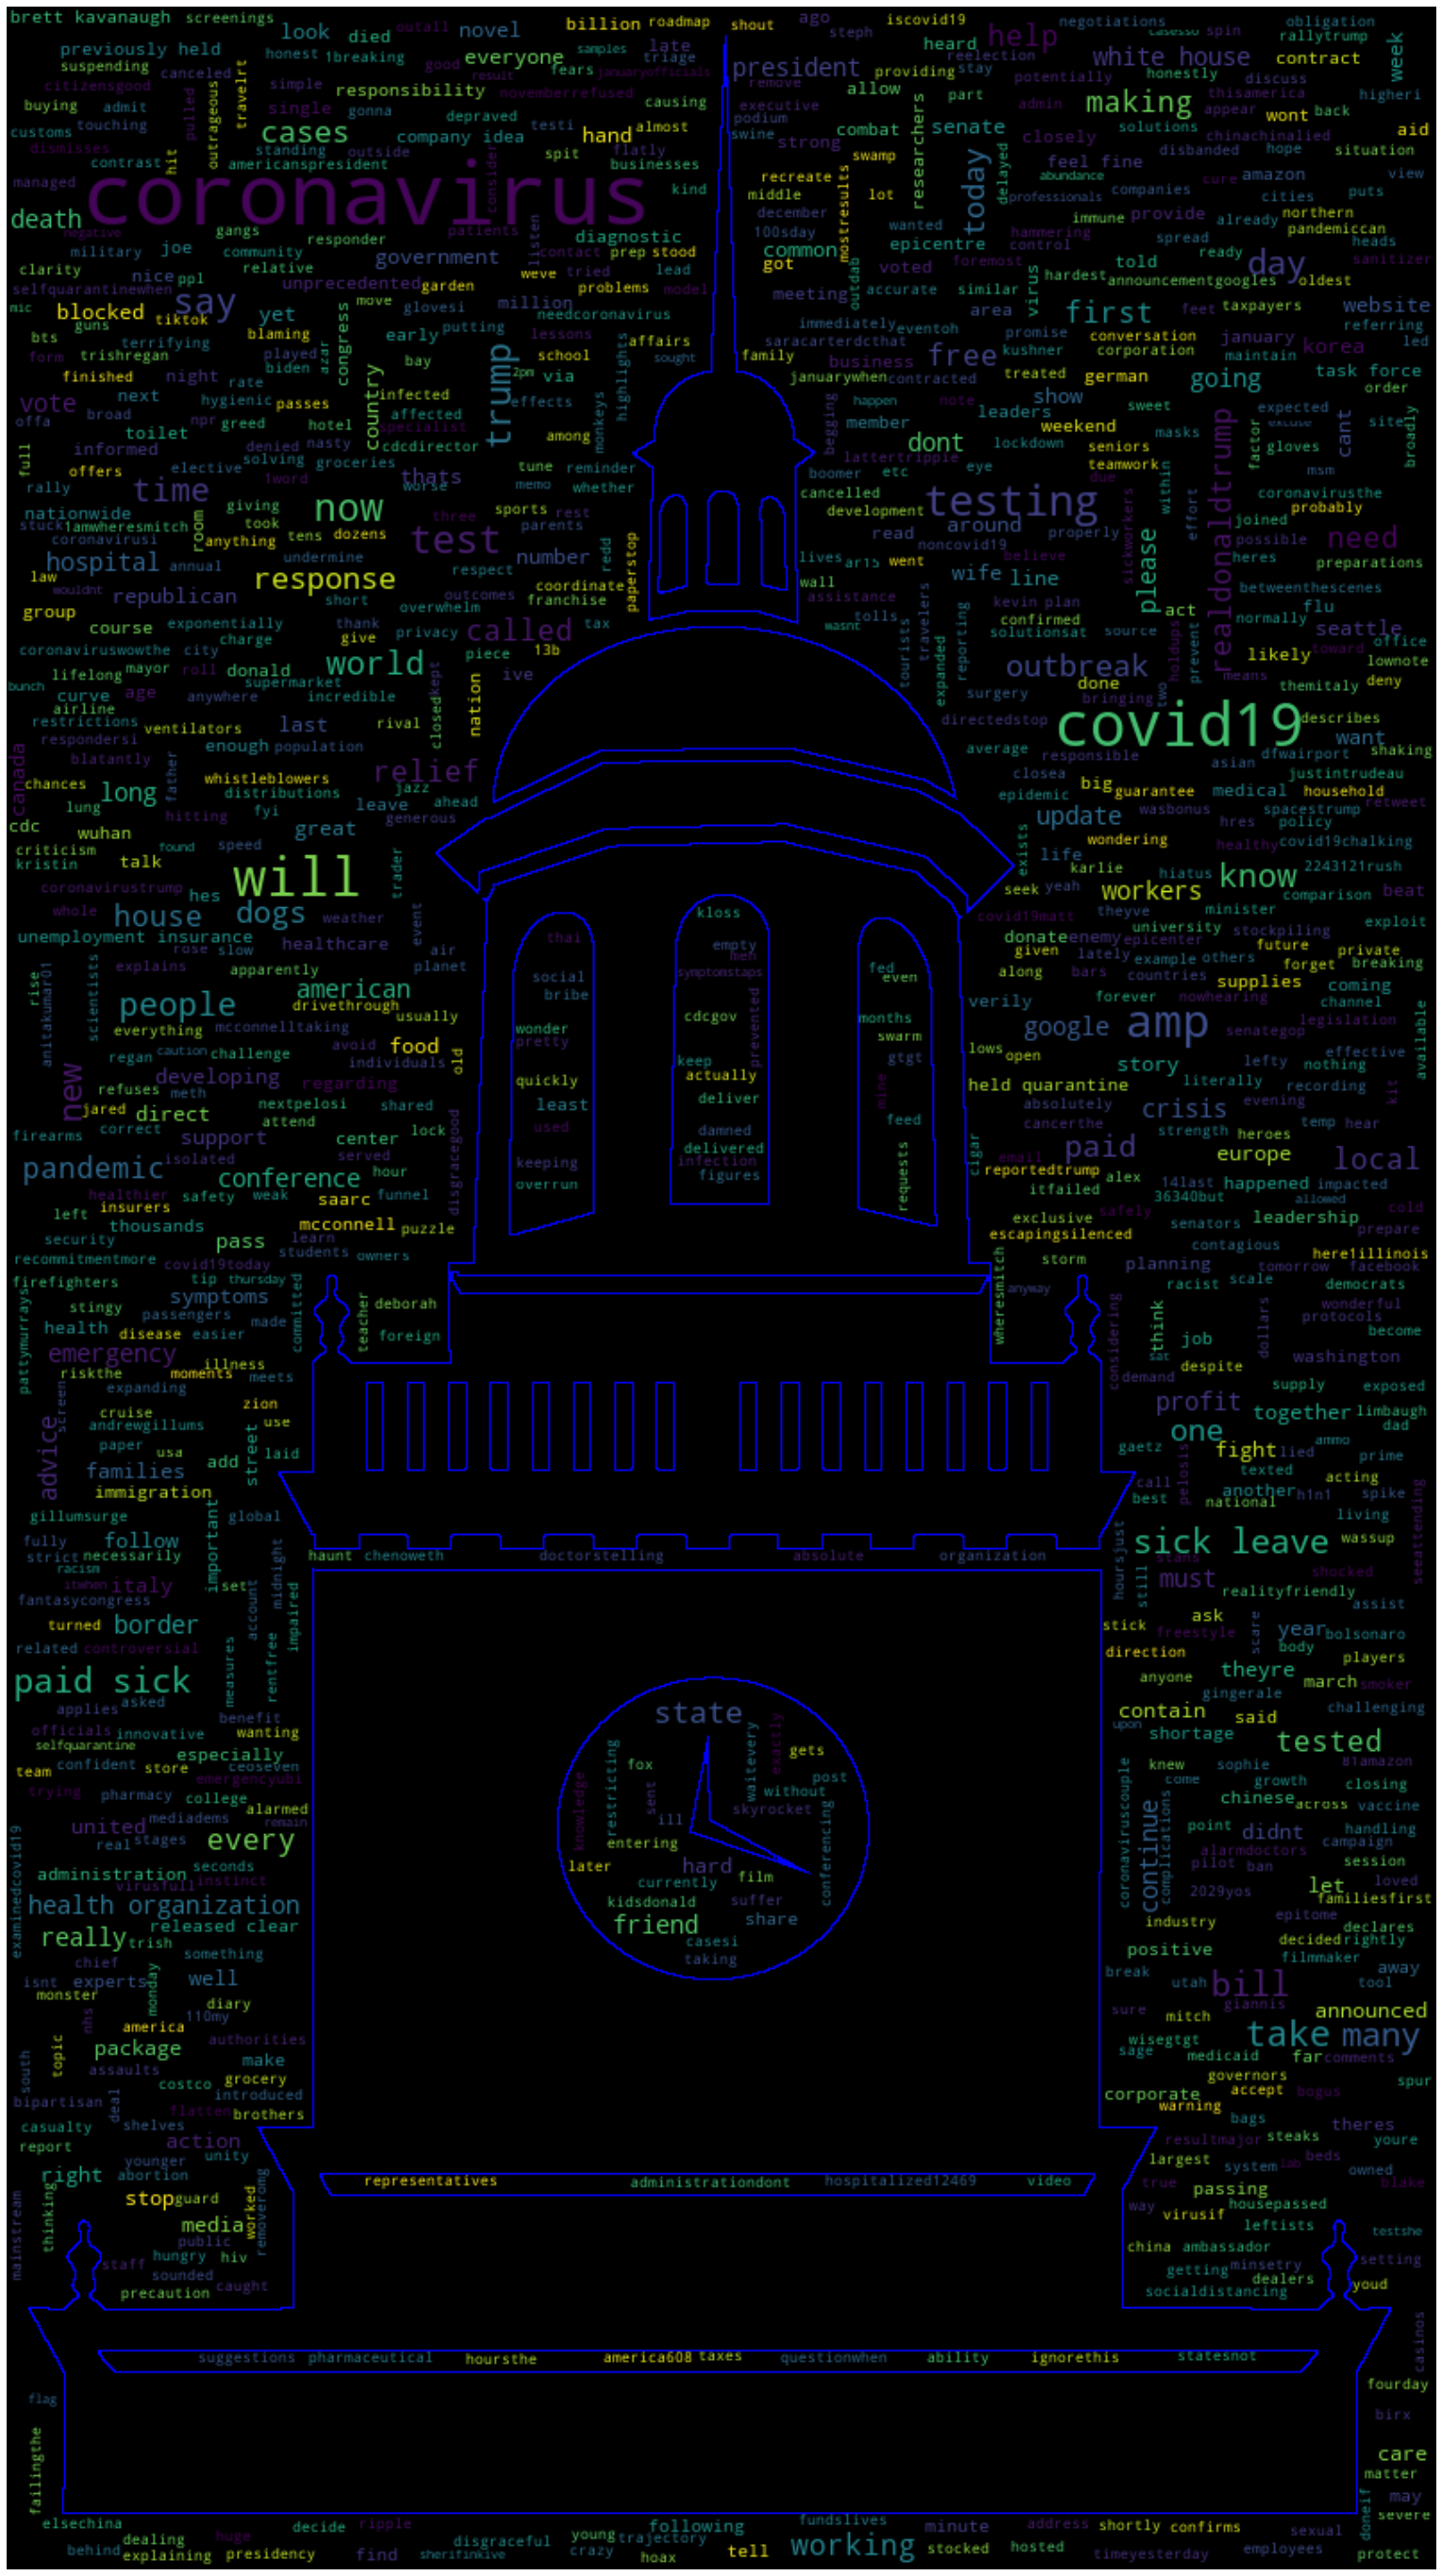

In [82]:
#Displaying the image
f = plt.figure(figsize=(50,50))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [84]:
#This takes awhile, but you can have multiple images populated at one time
wc1 = WordCloud(background_color="white", max_words=2000, mask = hu_mask, contour_width=1, contour_color='blue',stopwords = ['thread'])
clean_string = ','.join(words)
wc1.generate(clean_string)
wc2 = WordCloud(background_color="white", max_words=2000, mask = hu_inv, contour_width=1, contour_color='blue',stopwords = ['thread'])
wc2.generate(clean_string)
wc3 = WordCloud(background_color="white", max_words=2000, mask = tweet_mask, contour_width=1, contour_color='blue',stopwords = ['thread'])
wc3.generate(clean_string)

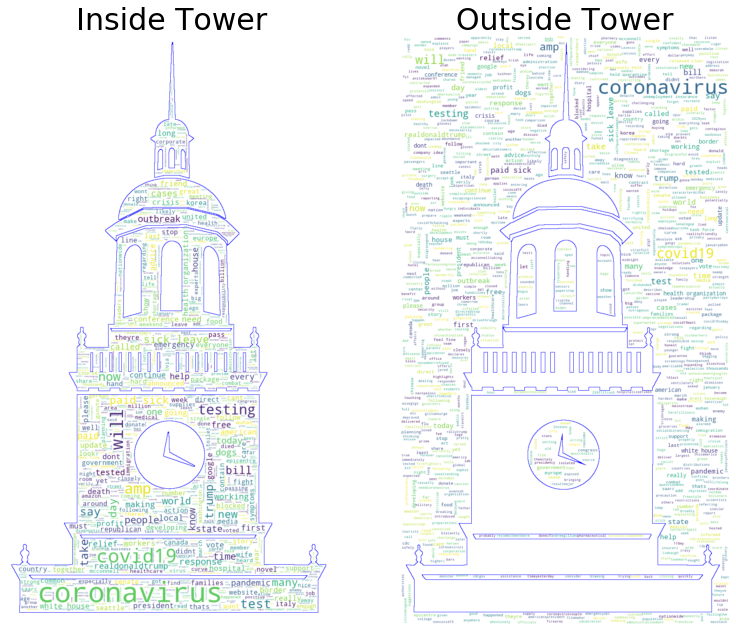

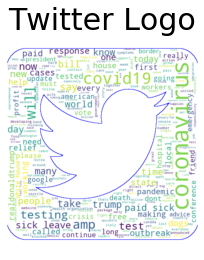

In [93]:
f = plt.figure(figsize=(20,50))
f.add_subplot(1,3, 1)
plt.imshow(wc1, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Inside Tower', size=30)
plt.axis("off")
f.add_subplot(1,3, 2)
plt.imshow(wc2, interpolation='bilinear')
plt.title('Outside Tower', size=30)
plt.axis("off")
plt.show()
f.add_subplot(133)
plt.imshow(wc3, interpolation='bilinear')
plt.title('Twitter Logo', size=30)
plt.axis("off")
plt.show()